# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Sofia Felan  
**Dataset:** Online Shoppers  
**Date:** 10/08/2025

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load your dataset here
# Replace this with your actual data loading code

df = pd.read_csv("online+shoppers+purchasing+intention+dataset.zip")
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [3]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (12330, 18)

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


=== NUMERICAL VARIABLES ===
Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


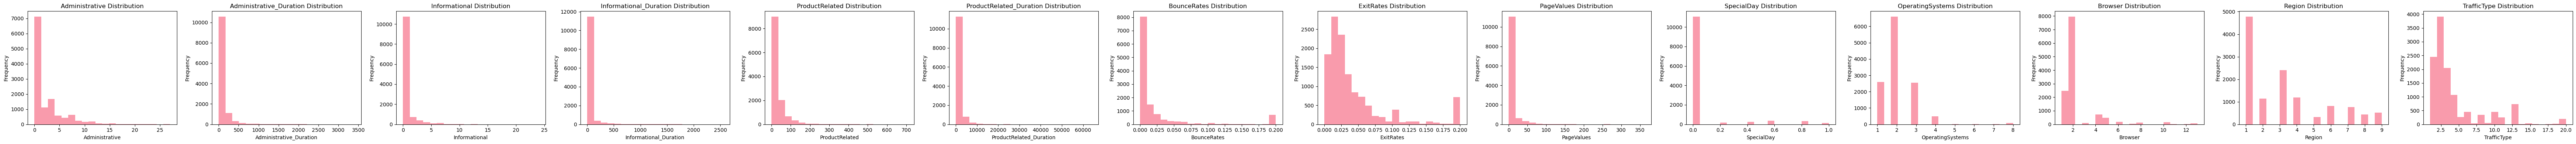

In [4]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType']

Month value counts:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


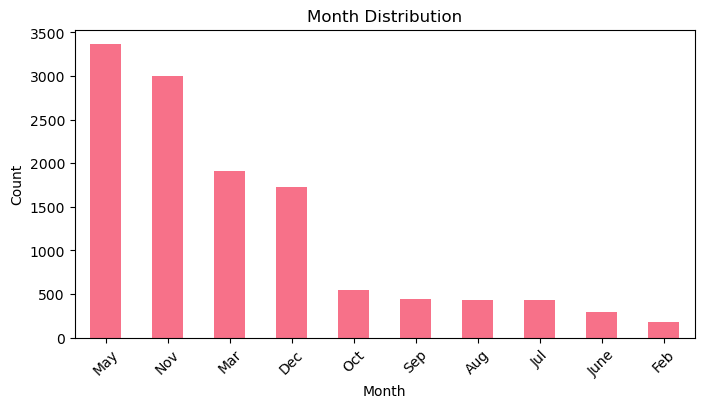


VisitorType value counts:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


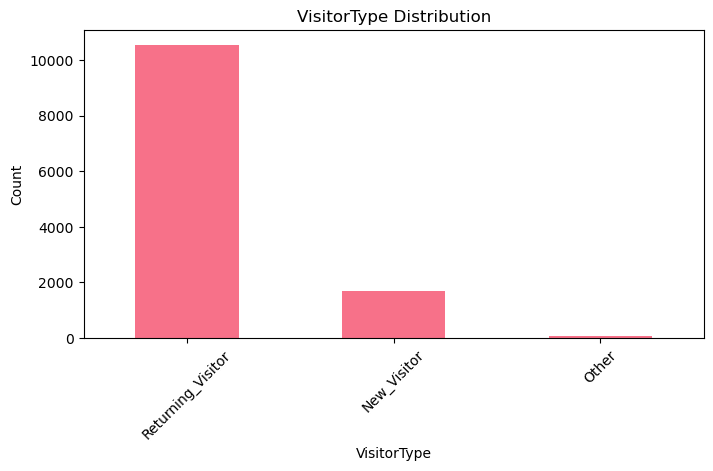

In [5]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


=== CORRELATION ANALYSIS ===


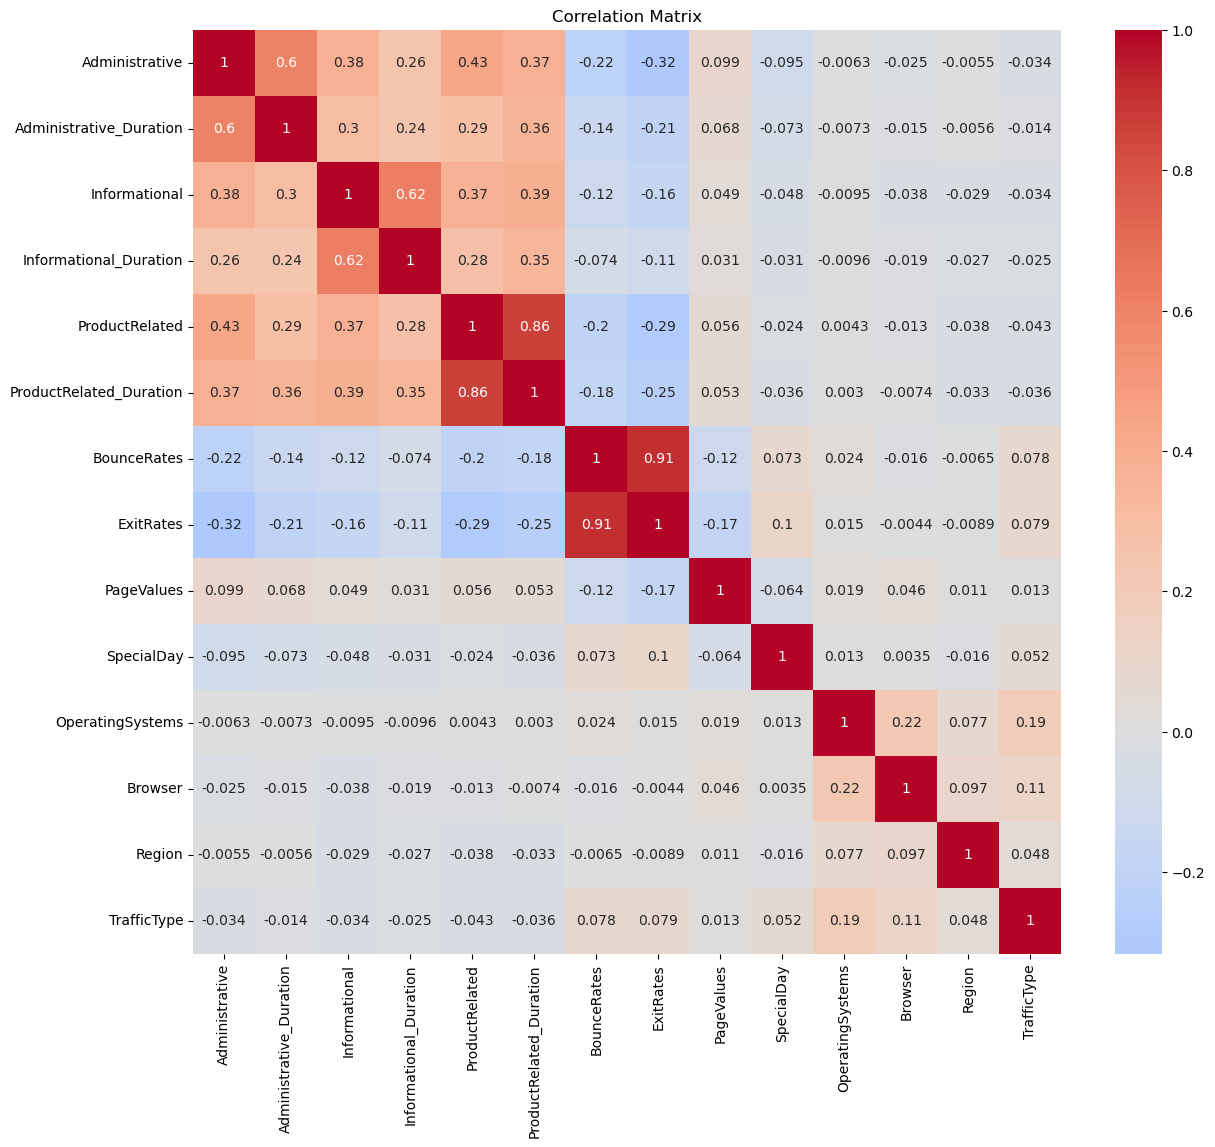

In [6]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType']

Month value counts:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


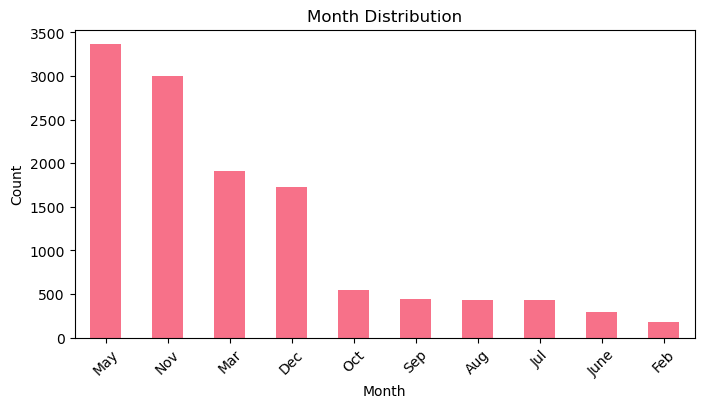


VisitorType value counts:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


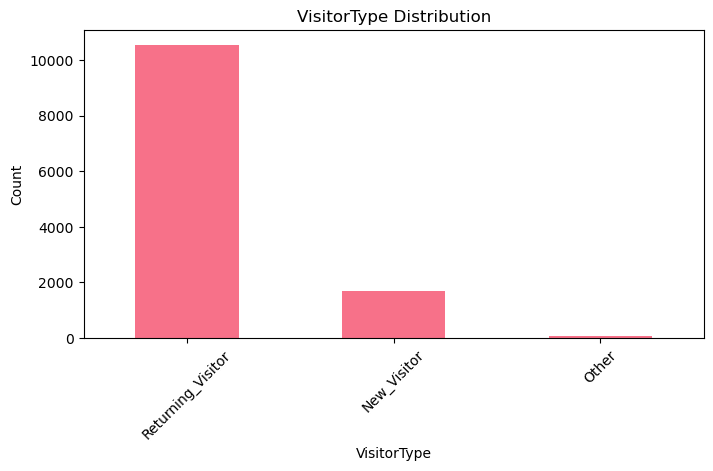

In [7]:
# Categorical variables analysis
print('=== CATEGORICAL VARIABLES ===')
categorical_cols = df.select_dtypes(include=['object']).columns
print(f'Categorical columns: {list(categorical_cols)}')

for col in categorical_cols:
    print(f'\n{col} value counts:')
    print(df[col].value_counts())

    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
avg_admin_time = (df['Administrative_Duration'] / df['Administrative']).mean()
avg_info_time = (df['Informational_Duration'] / df['Informational']).mean()
avg_product_time = (df['ProductRelated_Duration'] / df['ProductRelated']).mean()

print(f'Average time spent on an administrative page: {avg_admin_time} \nAverage time spent on an informational page {avg_info_time} \nAverage time spent on a product-related page: {avg_product_time}')

Average time spent on an administrative page: 37.94881948546389 
Average time spent on an informational page 69.39555127426121 
Average time spent on a product-related page: 37.75003240438953


I was curious how long a customer spent on average on the different types of pages, so I calculated the average time spent browsing per page to see if there was a noticeable distinction between the three types.

## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: 
**H1:** Customers who spend more time on product-related pages, as opposed to administrative or informational pages, are more likely to make a purchase.
- **Null Hypothesis (H0):** How long a customer spends on product-related pages is not more indicative of revenue being converted than time spent on any other page type. 
- **Alternative Hypothesis (H1):** Customers who spend more time on product-related pages, as opposed to administrative or informational pages, are more likely to make a purchase.
- **Rationale:** Product-related pages would have links to purchase the products on the page, so if a user is visiting a high number of product-related pages, they are likely to make a purchase.

### Hypothesis 2: 
**H2:** Returning visitors are more likely to make a purchase.
- **Null Hypothesis (H0):** Returning visitors and new visitors are equally likely to make a purchase.
- **Alternative Hypothesis (H1):** Returning visitors are more likely to make a purchase.
- **Rationale:** Returning visitors return to the website for a reason, possibly that they return with the intention of making a purchase.

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: Customers who spend more time on product-related pages, as opposed to administrative or informational pages, are more likely to make a purchase.

**Test Choice:** Mann-Whitney U
- **Why appropriate:** This test is appropriate because it checks whether the values in one group (where a purchase has been made) tend to be larger or smaller than those in another group (where a purchase was not made).

In [9]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

df['ProductRatio'] = df['ProductRelated_Duration'] / (df['Administrative_Duration'] + df['Informational_Duration'] + 1e-6)
df['AdminRatio'] = df['Administrative_Duration'] / (df['ProductRelated_Duration'] + df['Informational_Duration'] + 1e-6)
df['InfoRatio'] = df['Informational_Duration'] / (df['Administrative_Duration'] + df['ProductRelated_Duration'] + 1e-6)

from scipy.stats import mannwhitneyu

prod_group_true = df[df['Revenue'] == True]['ProductRatio']
prod_group_false = df[df['Revenue'] == False]['ProductRatio']

admin_group_true = df[df['Revenue'] == True]['AdminRatio']
admin_group_false = df[df['Revenue'] == False]['AdminRatio']

info_group_true = df[df['Revenue'] == True]['InfoRatio']
info_group_false = df[df['Revenue'] == False]['InfoRatio']

stat1, p1 = mannwhitneyu(prod_group_true, prod_group_false, alternative='greater')
stat2, p2 = mannwhitneyu(admin_group_true, admin_group_false, alternative='greater')
stat3, p3 = mannwhitneyu(info_group_true, info_group_false, alternative='greater')

print(f'Mann-Whitney U test on product-related pages p-value: {p1}')
print(f'Mann-Whitney U test on administrative pages p-value: {p2}')
print(f'Mann-Whitney U test on informational pages p-value: {p3}')

=== TESTING HYPOTHESIS 1 ===
Mann-Whitney U test on product-related pages p-value: 0.9995997325712268
Mann-Whitney U test on administrative pages p-value: 1.4700123960312242e-42
Mann-Whitney U test on informational pages p-value: 5.369134141400572e-32


The test on the product-related pages having such a high p-value demonstrates that there is not a significant distinction in browsing time for users who made purchases and users who didn't. However, upon analysis of the other two page types, we can see that they did show a significant distinction, disproving the alternative hypothesis and suggesting a different trend entirely.

### Testing Hypothesis 2: Returning visitors are more likely to make a purchase.

**Test Choice:** conversion rate comparison
- **Why appropriate:** This method of analysis is appropriate because it lets us compare the conversion rates among the different types of visitors, to see which visitor type had the highest conversion rate.


=== TESTING HYPOTHESIS 2 ===
Z-test p-value: 1.0

         VisitorType   Revenue
0        New_Visitor  0.249115
1              Other  0.188235
2  Returning_Visitor  0.139323


C:\Users\sfela\AppData\Local\Temp\ipykernel_24820\187708906.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_by_type, x='VisitorType', y='Revenue', palette='Set2')


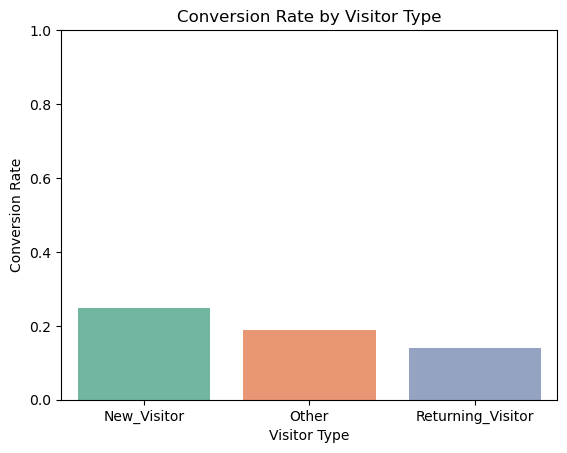

In [10]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

from statsmodels.stats.proportion import proportions_ztest

returning = df[df['VisitorType'] == 'Returning_Visitor']
new = df[df['VisitorType'] == 'New_Visitor']

successes = [returning['Revenue'].sum(), new['Revenue'].sum()]
nobs = [len(returning), len(new)]

stat, pval = proportions_ztest(successes, nobs, alternative='larger')
print(f'Z-test p-value: {pval}\n')

# pd.crosstab(df['VisitorType'], df['Revenue'], normalize='index')
df['VisitorType'].value_counts()
print(df.groupby('VisitorType')['Revenue'].mean().reset_index())

conversion_by_type = df.groupby('VisitorType')['Revenue'].mean().reset_index()
sns.barplot(data=conversion_by_type, x='VisitorType', y='Revenue', palette='Set2')

plt.title('Conversion Rate by Visitor Type')
plt.ylabel('Conversion Rate')
plt.xlabel('Visitor Type')
plt.ylim(0,1)
plt.show()

The z-test p-value being 1.0 represents that there is no proportion of the returning visitors group that had a higher conversion rate than the other two visitor types. This also disproves the alternative hypothesis, suggesting that returning visitors are not actually more likely to make purchases. To further explore this, I drew a comparison between the conversion rates for each visitor type, and found that new visitors had a higher conversion rate than returning visitors, who actually had the lowest conversion rate of the three types. The bar plot further illustrates this.

## 5. Summary and Conclusions

### Key Findings from EDA:
1. The overall conversion rate is very low, most visitors were returning visitors, and on average, most time was spent per page visiting informational pages.
2. Returning visitors behave differently from new visitors, though in what way was unclear. The exit rate was lower for sessions that resulted in purchases.
3. The time spent on administrative and informational pages differs dramatically between users who made purchases and those who didn't.  User familiarity plays a role in conversion likelihood as shown by the difference in purchase behavior for returning vivistors as opposed to new visitors.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | Mann-Whitney U Test | 0.99 | Not Significant | The amount of time spent browsing product-related pages as opposed to other page types was not significantly high for sessions that resulted in a purchase, disproving my alternative hypothesis that users that spend more time proportionately on product-related pages are more likely to make a purchase. |
| **H2** | Proportion z-test and conversion rate comparison | 1.0 | Not Significant | The p-value being 1.0 shows that returning shoppers are not statistically more likely to make a purchase and could even be less likely to make a purchase than other visitor types. |


### Key Insights:
- My results tell me that both of my hypotheses were inaccurate as my p-values were very high, indicating a very insignificant or no relationship between my target features and what they were tested against. Both null hypotheses were supported by my results, so I ran further tests to understand what the actual trends were.
- The practical implications are that, since users who spent a higher proportion of their time browsing product-related sites were not proven more likely to make purchases, it is possible that product browsing does not equate to purchase intent. This same analysis implies also that since there was a more significant difference in purchase action for more time spent on administrative or informational pages, maybe these pages are indicative of purchases being actively made and the administrative side of that, or of hesitation or decision-making in viewing informational pages. Regarding the returning vs new visitor analysis, the practical implications of that could be initial interest is a stronger driving factor in purchase intent than repeated engagement, just because a customer returns does not mean they have high purchasing intent.
- We should consider that there is no context behind these user sessions, so it is unclear why a user would stay longer on one page type than on another, especially since people have different shopping habits, some preferring to browse casually, while others would prefer to look more deeply. The type of device used in browsing could also be considered a limitation as it is not a feature included in the data set and could impact someone's browsing time and experience. A limitation for the returnins vs new customer analysis is the ambiguity of the term "returning" as it could stand for a user who has already made a purchase or a user who has simply browsed before. Returning users could also convert less, but spend more over time as opposed to new users. 

### Future Research:
- Additional analysis could be done into the purchase habits of different regions and also the trends throughout the year, especially closer to "special days" to see if proximity to a gift-giving holiday raises a user's likelihood of making a purchase. 
- If considering the operating system and browser type, it could also be important to consider the device being used as well. How the customer arrived in the shopping space could also be considered, be it through searching it up themself, or through an ad link. This could help determine the efficacy ads in converting revenue.

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [11]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: online shopping")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: online shopping
Sample size: 12330 observations
Number of features: 20 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
